In [1]:
# Author: Willian M. Braga 
# Análises diárias dos indices de fechamento Ibovespa 


import pandas as pd
import datetime

dataset = pd.read_csv('/home/will/Documentos/SIAD/datasets/ipeadata_ibovespa_fechamento.csv', sep=",")
dataset

,Data,Índice de ações - Ibovespa - fechamento - - - Bolsa de Valores- Mercadorias e Futuros (BM&FBovespa) - GM366_IBVSP366,Estados Unidos - Índice de ações - Dow Jones - fechamento - - - Valor Econômico - GM366_DOW366,Unnamed: 3
0,02/01/1900,NaN,68.13,NaN
1,03/01/1900,NaN,66.61,NaN
2,04/01/1900,NaN,67.15,NaN
3,05/01/1900,NaN,66.71,NaN
4,06/01/1900,NaN,66.02,NaN
...,...,...,...,...
44018,09/07/2020,99160.0,25706.09,NaN
44019,10/07/2020,100032.0,26075.30,NaN
44020,11/07/2020,NaN,NaN,NaN
44021,12/07/2020,NaN,NaN,NaN


In [2]:
# Preparação dos dados
dataset.columns = ['data_fato','indice_ibovespa','indice_dow_jones', '?']  
dataset.drop('?', inplace=True, axis=1)  
dataset = dataset.dropna()
dataset

,data_fato,indice_ibovespa,indice_dow_jones
34517,05/07/1994,3564.3,3652.479645
34518,06/07/1994,3753.5,3674.494236
34519,07/07/1994,3904.9,3688.415227
34520,08/07/1994,4051.9,3709.134842
34523,11/07/1994,4010.8,3702.983707
...,...,...,...
44016,07/07/2020,97761.0,25890.180000
44017,08/07/2020,99770.0,26067.280000
44018,09/07/2020,99160.0,25706.090000
44019,10/07/2020,100032.0,26075.300000


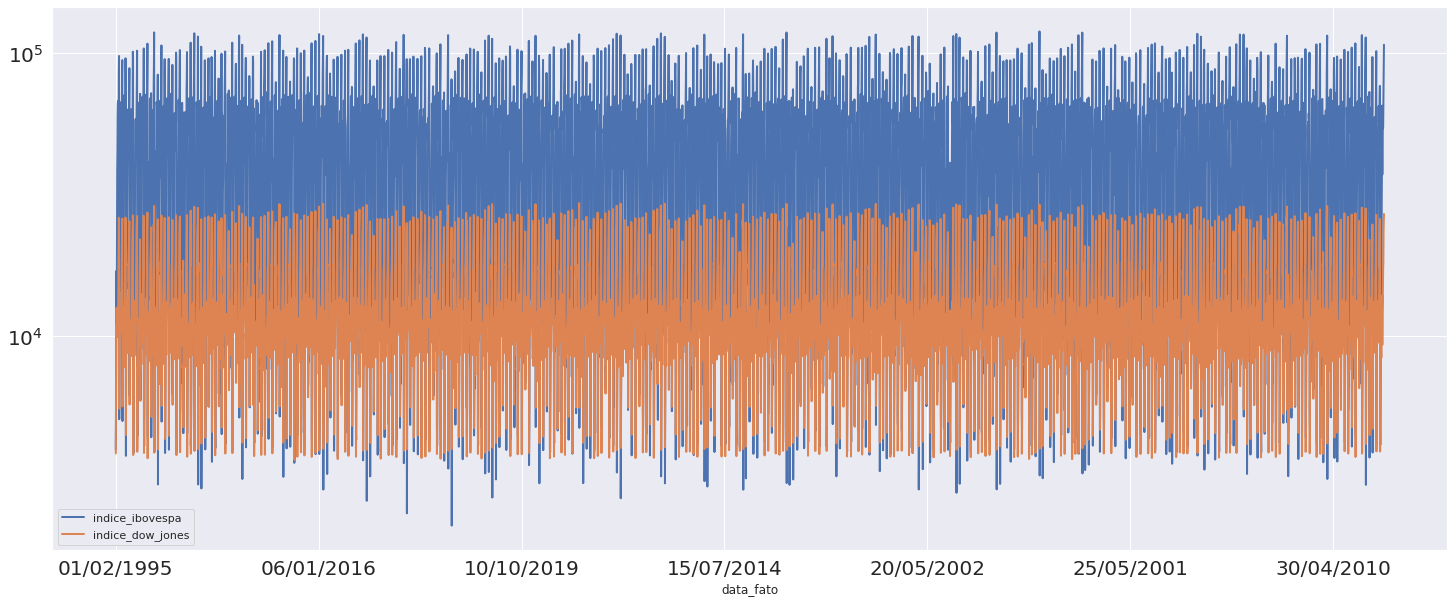

In [3]:
import seaborn as sns
sns.set(rc={'figure.figsize':(25,10)})
dataset.set_index('data_fato').sort_index().plot(y=['indice_ibovespa', 'indice_dow_jones'] ,fontsize=20,linewidth=2 , logy=True)

In [4]:
# Restringir periodo entre 02/01/2010 - 02/01/2020
dataset['data_fato'] = pd.to_datetime(dataset['data_fato'], format='%m/%d/%Y')
periodo = (dataset['data_fato']>'01/02/2010') & (dataset['data_fato'] < '01/03/2020')
dataset_2 = dataset[periodo].copy()
dataset_2

ValueError: time data '13/07/1994' does not match format '%m/%d/%Y' (match)

In [ ]:
sns.set(rc={'figure.figsize':(20,10)})
dataset_2.set_index('data_fato').sort_index().plot(y=['indice_ibovespa', 'indice_dow_jones'],logy=True ,fontsize=20,linewidth=1)

In [ ]:
dataset_2.corr(method='pearson').style.background_gradient()
# Com base na correlação podemos concluir que...

In [ ]:
dataset_2.set_index('data_fato').sort_index()

In [ ]:
from sklearn.preprocessing import StandardScaler

ibovespa_norm = dataset_2["indice_ibovespa"].values.copy()
ibovespa_norm.shape = (len(ibovespa_norm), 1)

scaler = StandardScaler()
ibovespa_norm = scaler.fit_transform(ibovespa_norm)
dataset_2["indice_ibovespa_norm"] = ibovespa_norm

dow_jones_norm = dataset_2["indice_dow_jones"].values.copy()
dow_jones_norm.shape = (len(dow_jones_norm), 1)

scaler = StandardScaler()
dow_jones_norm = scaler.fit_transform(dow_jones_norm)
dataset_2["indice_dj_norm"] = dow_jones_norm
dataset_2.head(10)

In [ ]:
df_ibovespa = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_ibovespa["E{}".format(i)] = dataset_2["indice_ibovespa_norm"].shift(-i)
df_ibovespa = df_ibovespa.iloc[:-window_size]
df_ibovespa

In [ ]:
arr = df_ibovespa.values
arr

In [ ]:
X = arr[:, :-1]
target = arr[:, -1]
print(X)
print(target)

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

mlp = MLPRegressor(hidden_layer_sizes=(50,100,), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict = cross_val_predict(mlp, X, target, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target, full_predict)))

In [ ]:
print(len(full_predict))
print(len(dataset_2["indice_ibovespa_norm"]))

In [ ]:
import numpy as np

values_to_add = list()
for i in range(0, window_size):
    values_to_add.append(float("NaN"))
full_predict = np.insert(full_predict, 0, values_to_add)
full_predict.shape = (len(full_predict), 1)
full_predict.shape

In [ ]:
dataset_2["predict_ibovespa"] = full_predict
dataset_2

In [ ]:
dataset_2.set_index('data_fato').plot(y=["indice_ibovespa_norm", "predict_ibovespa"] ,fontsize=20,linewidth=3)

In [ ]:
# Indice Dow Jones
df_jones = pd.DataFrame()
window_size = 17
for i in range(0, window_size + 1):
    df_jones["E{}".format(i)] = dataset_2["indice_dj_norm"].shift(-i)
df_jones = df_jones.iloc[:-window_size]
df_jones

In [ ]:
arr_dj = df_jones.values
arr_dj

In [ ]:
X_dj = arr_dj[:, :-1]
target_dj = arr_dj[:, -1]
print(X_dj)
print(target_dj)

In [ ]:
mlp = MLPRegressor(hidden_layer_sizes=(50,100,), activation="logistic", max_iter=1000, solver="sgd", verbose=True)
full_predict_dj = cross_val_predict(mlp, X_dj, target_dj, cv=10)
print("Mean Squared Error: %s" %(metrics.mean_squared_error(target_dj, full_predict_dj)))

In [ ]:
print(len(full_predict_dj))
print(len(dataset_2["indice_dj_norm"]))

In [ ]:
values_to_add_dj = list()
for i in range(0, window_size):
    values_to_add_dj.append(float("NaN"))
full_predict_dj = np.insert(full_predict_dj, 0, values_to_add_dj)
full_predict_dj.shape = (len(full_predict_dj), 1)
full_predict_dj.shape

In [ ]:
dataset_2["predict_dj"] = full_predict_dj
dataset_2

In [ ]:
dataset_2.set_index('data_fato').plot(y=["indice_dj_norm", "predict_dj"] ,fontsize=20,linewidth=3)